# Different Types of Gradient Descent 

Link to the Youtube tutorial video: https://www.youtube.com/watch?v=IU5fuoYBTAM&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=14

1) **Forward pass vs Backward pass:**  <br />
    1) <img src="hidden\photo0.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        1) https://stackoverflow.com/questions/36740533/what-are-forward-and-backward-passes-in-neural-networks
        2) One forward pass is performed to calculate the cost function (cumulative error) at an epoch(iteration). Only the samples involved in the forward pass will be used to calculate the cost function (cumulative error) at an epoch(iteration)
        3) At the same epoch(iteration), after the cost function is calculated, a backward pass is performed by implementing gradient descent to get the new weights for the neural network
        4) Hence, forward pass and backward pass together make one epoch (iteration)

1) **Batch Gradient Descent:**  <br />
    1) <img src="hidden\photo1.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
    2) <img src="hidden\photo2.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />

2) **Stochastic Gradient Descent (SGD):**  <br />
    1) At each iteration(epoch), randomly pick a sample to calculate its error, then you adjust the weights of the neural network before the next iteration(epoch) start.
        1) <img src="hidden\photo3.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        2) <img src="hidden\photo4.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        3) <img src="hidden\photo5.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        4) <img src="hidden\photo6.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
        5) <img src="hidden\photo7.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />

3) **Mini Batch Gradient Descent:**  <br />
    1) <img src="hidden\photo8.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />
    2) <img src="hidden\photo9.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />

In [136]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load the dataset

In [137]:
# Load the dataset into the dataframe called df
df = pd.read_csv("homeprices_banglore.csv")

# Randomly pick 5 samples from df dataframe and show them
df.sample(5)

,area,bedrooms,price
4,1200,2,51.0
19,800,1,32.0
10,1800,3,82.0
3,1521,3,75.0
18,2770,3,102.0


# Data preprocessing

## Scale all data of the dataset (To ensure all parameters (independent and dependent variables) of the dataset are on the same scale), using the MinMaxScaler() of Sklearn

1) Scaling the data of a dataset allows the machine learning model to perform better
2) MinMaxScaler() will scale the data into the range between 0 and 1

In [138]:
from sklearn import preprocessing

# Create a scaling object to scale independent variables (features)
sx = preprocessing.MinMaxScaler()

# Create a scaling object to scale dependent variable (ground truth/target)
sy = preprocessing.MinMaxScaler()

# Scale the features of the dataset
scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
print('Scaled features:\n', scaled_X)

# Scale the ground truth of the dataset
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
print('\nScaled ground truth:\n', scaled_Y)

Scaled features:
 [[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]

Scaled ground truth:
 [[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


# Implement batch gradient descent

The objective to implement gradient descent is to find the value of weights and bias that provide the minimal cost function (global minimal)

In [139]:
def batch_gradient_descent(x, y_true, epochs, learning_rate):
    number_of_features = x.shape[1]
    # Initialize the value of weights and bias (can be any number)
    w = np.ones(shape=number_of_features) # Initialize all the weights to have value of 1. The number of 1 returned by np.ones() in 1D array is based on the number of features
    bias = 0 # Initialize the bias as 0
    # Get the number of samples in the train set
    total_samples = x.shape[0] 

    # Create an empty python list called cost_list to record the cost function at a particular epoch
    cost_list = []
    # Create an empty python list called epoch_list to record the number of epoch which its cost function is recorded
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, x.T) + bias # The linear equation: w1 * area + w2 * bedrooms + bias. x.T means tranpose the x matrix. np.dot() is dot product
        
        # Calculate the partial derivative of MSE (cost function here) with respect to all features respectively in one shot (using matrix & dot product)
        w_PartialDerivative = -(2/total_samples) * (x.T.dot(y_true - y_predicted))
        # Calculate the partial derivative of MSE (cost function here) with respect to the bias
        bias_PartialDerivative = -(2/total_samples) * np.sum(y_true - y_predicted)

        # Get the new (adjusted) value of weights respectively in one shot (using matrix)
        w = w - learning_rate * w_PartialDerivative
        # Get the new (adjusted) value of bias 
        bias = bias - learning_rate * bias_PartialDerivative

        # calculate the mean square error (MSE) as the cost function
        cost = np.mean(np.square(y_true - y_predicted))

        # Record the value of cost function and epoch when the iteration(epoch) is at 0, 10, 20, ... etc
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, bias, cost, cost_list, epoch_list

w_batch, bias_batch, cost_batch, cost_list_batch, epoch_list_batch = batch_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0],), 500, 0.01)

print('After implementing batch gradient descent (tranining), the value of:\n' + 'Weight 1 (w1) = ' + str(w_batch[0]) + '\nWeight 2 (w2) = ' + str(w_batch[1]) + '\nBias = ' + str(bias_batch) + '\nCost function= ' + str(cost_batch))



After implementing batch gradient descent (tranining), the value of:
Weight 1 (w1) = 0.707124642770257
Weight 2 (w2) = 0.6745652664894097
Bias = -0.23034857438407427
Cost function= 0.0068641890429808105


## Visualize Cost function vs Epoch Graph

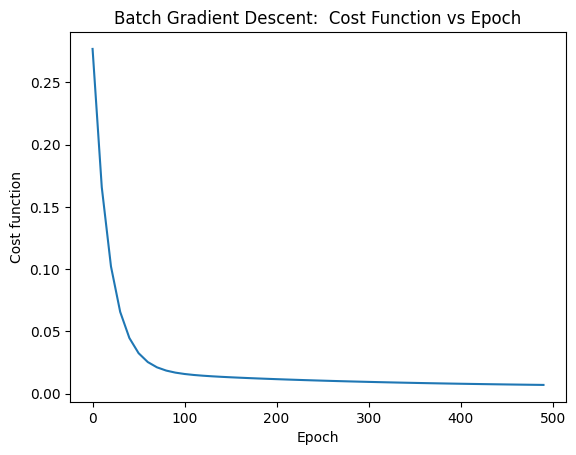

In [140]:
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("Batch Gradient Descent:  Cost Function vs Epoch")
plt.plot(epoch_list_batch, cost_list_batch)

## Make prediction using the weights and bias obtained from batch gradient descent

In [141]:
def predict(area, bedrooms, w, bias):
    # Since feature scaler sx is trained(fit) to scale(transform) features of the dataset above, we use sx to scale any input features before making prediction
    scaled_x = sx.transform([[area, bedrooms]])[0] # scaled_x array is a 2D array that only contains information on the 1st dimension. so we need [0] to access the information (scaled area & bedroom) on the 1st dimension.
    scaled_y_predicted = w[0] * scaled_x[0] + w[1] * scaled_x[1] + bias # the linear equation represents weighted sum
    # Since ground truth scaler sy is trained(fit) to scale(transform) ground truths of the dataset above, we use sy to unscale any predictions back to their original value
    return sy.inverse_transform([[scaled_y_predicted]])[0][0] # Since the results is returned as a 2D array, we use [0][0] to get only the single value

print('The predicted homeprice with 2600 area and 4 bedrooms = ', predict(2600, 4, w_batch, bias_batch))

print('The ground truth of the homeprice with 2600 area and 4 bedrooms = ', df.price[1])

The predicted homeprice with 2600 area and 4 bedrooms =  128.45484403267596
The ground truth of the homeprice with 2600 area and 4 bedrooms =  120.0


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Implement stochastic gradient descent

1) The objective to implement gradient descent is to find the value of weights and bias that provide the minimal cost function (global minimal)
2) SGD requires more epoch (iteration) to arrive at the same cost function value as the batch gradient descent
3) However, for SGD, in every epoch, you are going through only 1 sample, so computation wise SGD still can be lightweight if the dataset is huge.

In [142]:
import random

def stochastic_gradient_descent(x, y_true, epochs, learning_rate):
    number_of_features = x.shape[1]
    # Initialize the value of weights and bias (can be any number)
    w = np.ones(shape=number_of_features) # Initialize all the weights to have value of 1. The number of 1 returned by np.ones() in 1D array is based on the number of features
    bias = 0 # Initialize the bias as 0
    # Get the number of samples in the train set
    total_samples = x.shape[0] 

    # Create an empty python list called cost_list to record the cost function at a particular epoch
    cost_list = []
    # Create an empty python list called epoch_list to record the number of epoch which its cost function is recorded
    epoch_list = []

    for i in range(epochs):
        # Use random.randint() to generate a value randomly which then used as the index to access a sample in the train set (Purpose is to pick a sample randomly from the train set)
        random_index = random.randint(0, total_samples-1)
        sample_x = x[random_index] # Get the features of the single randomly selected sample in the train set
        sample_y = y_true[random_index] # Get the ground truth of the single randomly selected sample in the train set

        # The linear equation: w1 * area + w2 * bedrooms + bias. x.T means tranpose the x matrix. np.dot() is dot product
        y_predicted = np.dot(w, sample_x.T) + bias 
        
        # Calculate the partial derivative of MSE (cost function here) with respect to all features respectively in one shot (using matrix & dot product)
        w_PartialDerivative = -(2/total_samples) * (sample_x.T.dot(sample_y - y_predicted))
        # Calculate the partial derivative of MSE (cost function here) with respect to the bias
        bias_PartialDerivative = -(2/total_samples) * (sample_y - y_predicted)

        # Get the new (adjusted) value of weights respectively in one shot (using matrix)
        w = w - learning_rate * w_PartialDerivative
        # Get the new (adjusted) value of bias 
        bias = bias - learning_rate * bias_PartialDerivative

        # calculate the mean square error (MSE) as the cost function
        cost = np.square(sample_y - y_predicted)

        # Record the value of cost function and epoch when the iteration(epoch) is at 0, 10, 20, ... etc
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, bias, cost, cost_list, epoch_list

w_SGD, bias_SGD, cost_SGD, cost_list_SGD, epoch_list_SGD = stochastic_gradient_descent(scaled_X, scaled_Y.reshape(scaled_Y.shape[0],), 10000, 0.01)

print('After implementing batch gradient descent (tranining), the value of:\n' + 'Weight 1 (w1) = ' + str(w_SGD[0]) + '\nWeight 2 (w2) = ' + str(w_SGD[1]) + '\nBias = ' + str(bias_SGD) + '\nCost function= ' + str(cost_SGD))



After implementing batch gradient descent (tranining), the value of:
Weight 1 (w1) = 0.7114130847805398
Weight 2 (w2) = 0.6789002611846433
Bias = -0.2323784088307955
Cost function= 0.011105390148331272


## Visualize Cost function vs Epoch Graph

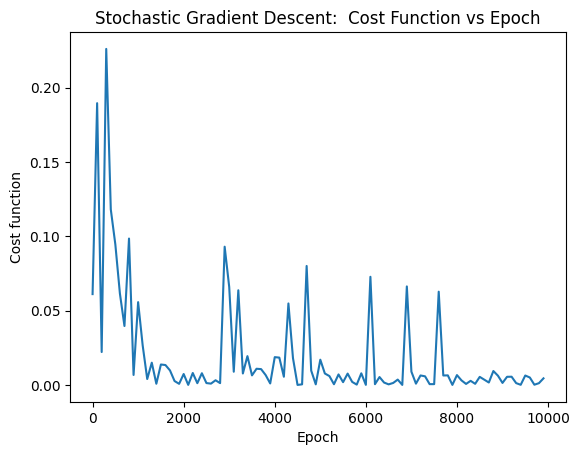

In [143]:
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("Stochastic Gradient Descent:  Cost Function vs Epoch")
plt.plot(epoch_list_SGD, cost_list_SGD)

## Make prediction using the weights and bias obtained from stochastic gradient descent

In [144]:
print('The predicted homeprice with 2600 area and 4 bedrooms = ', predict(2600, 4, w_SGD, bias_SGD))

print('The ground truth of the homeprice with 2600 area and 4 bedrooms = ', df.price[1])

The predicted homeprice with 2600 area and 4 bedrooms =  128.97907646026056
The ground truth of the homeprice with 2600 area and 4 bedrooms =  120.0


c:\Users\weiyo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#### Extra information: Show how to reduce an Array's Number of Dimensions

For more details: https://realpython.com/numpy-reshape/

<img src="hidden\photo10.png" alt="This image is a representation of the simple neural network" style="width: 400px;"/>  <br />

In [145]:
print('The dimension of scaled_Y array: ' + str(scaled_Y.ndim) + 'D\n')

# Reduce the dimension of scaled_Y array. Since scaled_Y is a 2D array (20 rows, 1 column), we reshape it into a 1D array (20,)
reshaped_scaled_Y = scaled_Y.reshape(scaled_Y.shape[0],)
print('reshaped_scaled_Y: ', reshaped_scaled_Y)

print('The dimension of reshape_scaled_Y array: ' + str(reshaped_scaled_Y.ndim) + 'D\n')


The dimension of scaled_Y array: 2D

reshaped_scaled_Y:  [0.05237037 0.65185185 0.22222222 0.31851852 0.14074074 0.04444444
 0.76296296 0.91111111 0.13333333 1.         0.37037037 0.8
 0.04444444 0.05925926 0.51111111 0.07407407 0.11851852 0.20740741
 0.51851852 0.        ]
The dimension of reshape_scaled_Y array: 1D

